# Imports

In [578]:
# This magic command clears any saved variables
# When this cell is executed, all variables and their values are deleted, so be careful.
%reset -f

In [579]:
# add all necessary imports in this cell
# define all constants (is any are used) after the imports in this cell

# ... your imports here ...

# We are introducing "seaborn" and "sklearn" today

# "seaborn" is a plotting wrapper library around matplotlib
# making it easier to use
import seaborn as sns

# "sklearn" / "scikit-learn" is the famous Python machine learning library
# though today we're mainly going to look at its
# built-in functionality for feature selection
from sklearn.feature_selection import mutual_info_classif, chi2

# Data dictionary for the `Titanic` dataset

- `PASSENGERID` => Id of passenger
- `SURVIVED`    => Whether passenger survived
- `PCLASS`      => Ticket class
- `NAME`        => Name
- `SEX`         => Gender
- `AGE`         => Age of passenger
- `SIBSP`       => # of siblings and/or spouses aboard
- `PARCH`       => # of parents and/or children aboard
- `TICKET`      => Ticket number
- `FARE`        => Cost of ticket
- `CABIN`       => Cabin number
- `EMBARKED`    => Port of Embarkation

# Load data

**TASK 1**

In the GitHub repo, in the `DATA` folder there are two `.csv` files called
`titanic_train.csv` and `titanic_test.csv`.

Load them, display each of them, concatenate them
into a new variable called `df_titanic`
and display the contents of `df_titanic`.

Make sure the index of `df_titanic` starts from `0` and ends with `1,781`.

Also, add a `split` column, so that each row saves information about which set it came from.

> Note: When loading files from GitHub, make sure to use
the "raw" version of the data (the link should contain
"raw.githubusercontent.com").

In [580]:
# Expected output for "df_train"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,split
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Train
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Train
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Train
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Train


In [581]:
# Expected output for "df_test"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,split
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Test
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Test
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Test
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Test
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Test
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Test
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Test
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Test


In [582]:
# Expected output for "df_titanic"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,split
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Test
1778,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Test
1779,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Test
1780,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Test


**TASK 2**

Rename the `Sex` column to `Gender`

In [583]:
# Expected output after renaming.

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,split
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Test
1778,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Test
1779,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Test
1780,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Test


**TASK 3**

Make the "Survived" column be the right-most column

In [584]:
# Expected output.

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,split,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Test,0
1778,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Test,1
1779,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Test,0
1780,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Test,1


# Exploratory data analysis

**TASK 4**

Display information about each column.

Using `describe`, display information only about the numberic columns
- Hint 1: `df.describe`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
- Hint 2: Use the `include` parameter to display information only about character columns.

Try to interpret what the tables show you. Is there things out of the ordinary.

In [585]:
# Expected output.

,count,mean,std,min,25%,50%,75%,max
PassengerId,1782.0,446.000000,257.281582,1.00,223.2500,446.0000,668.75,891.0000
Pclass,1782.0,2.308642,0.835836,1.00,2.0000,3.0000,3.00,3.0000
Age,1428.0,29.699118,14.521407,0.42,20.0000,28.0000,38.00,80.0000
SibSp,1782.0,0.523008,1.102434,0.00,0.0000,0.0000,1.00,8.0000
Parch,1782.0,0.381594,0.805831,0.00,0.0000,0.0000,0.00,6.0000
Fare,1782.0,32.204208,49.679476,0.00,7.9031,14.4542,31.00,512.3292
Survived,1782.0,0.383838,0.486456,0.00,0.0000,0.0000,1.00,1.0000


In [586]:
# Expected output.

,count,unique,top,freq
Name,1782,891,"Braund, Mr. Owen Harris",2
Gender,1782,2,male,1154
Ticket,1782,681,347082,14
Cabin,408,147,B96 B98,8
Embarked,1778,3,S,1288
split,1782,2,Train,891


In [587]:
# Expected output.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1782 non-null   int64  
 1   Pclass       1782 non-null   int64  
 2   Name         1782 non-null   object 
 3   Gender       1782 non-null   object 
 4   Age          1428 non-null   float64
 5   SibSp        1782 non-null   int64  
 6   Parch        1782 non-null   int64  
 7   Ticket       1782 non-null   object 
 8   Fare         1782 non-null   float64
 9   Cabin        408 non-null    object 
 10  Embarked     1778 non-null   object 
 11  split        1782 non-null   object 
 12  Survived     1782 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 181.1+ KB


**TASK 5**

Create tables that show:

1. How many missing values are the per column?
2. How many unique values are the per column?

Notice the order in the output.

In [588]:
# Expected output.

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Gender         0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
split          0.000000
Survived       0.000000
dtype: float64

In [589]:
# Expected output.

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Gender           2
split            2
Survived         2
dtype: int64

**TASK 6**

Check the distribution of the `Survived` column both in terms out total numbers and percentages.

Assign this distribution to a dataframe `df_survived_distribution`.

Display `df_survived_distribution`.

In [590]:
# Expected output.

,count,proportion
Survived,,
0,1098,61.62
1,684,38.38


**TASK 7**

Create the following plots:

1. Survival Distribution using `matplotlib`.
2. Gender Distribution using `matplotlib` and `seaborn`.
3. Survival rate against gender using `seaborn`.

Try to interpret what each of them is showing you.

Hints:
- `plt.bar` chart: https://pythonbasics.org/matplotlib-bar-chart/
- `sns.barplot`: https://seaborn.pydata.org/generated/seaborn.barplot.html
- `pd.crosstab`: https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-crosstabulations

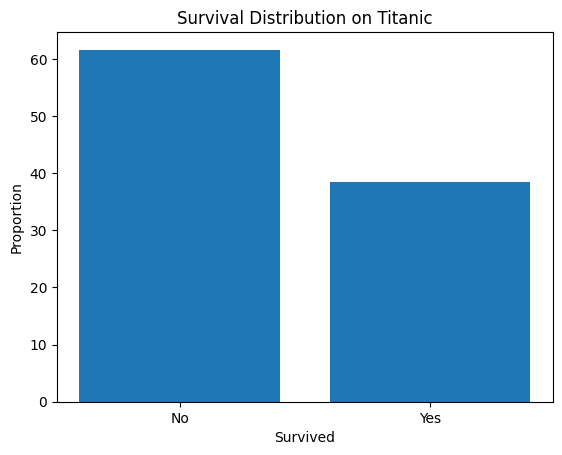

In [591]:
# Expected output.

<Axes: title={'center': 'Survival Distribution on Titanic'}, xlabel='Survived', ylabel='Proportion'>

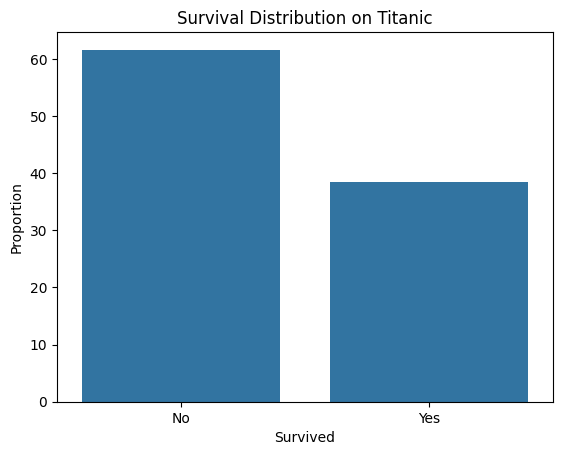

In [592]:
# The same could be done using seaborn
# sns.barplot: https://seaborn.pydata.org/generated/seaborn.barplot.html

# There are three parts:
# "data": this is the dataframe that holds the columns that need to be plotted
# "x": this is the data to be used on the x-axis (if string, then it refers to a column in "data")
# "y": this is the data to be used on the y-axis (if string, then it refers to a column in "data")

# The trailing ";" at end is used to hide printing of metainformation above the chart
# Compare the below output with the one in the following cell
# Notice how "<Axes: title={'center': 'Survival Distribution on Titanic'}, xlabel='Survived', ylabel='Proportion'>"
# is not present in the following cell's output.

plt.title('Survival Distribution on Titanic')
plt.xlabel('Survived')
plt.ylabel('Proportion')

sns.barplot(
    data=df_survived_distribution,
    x=['No', 'Yes'],
    y='proportion',
)

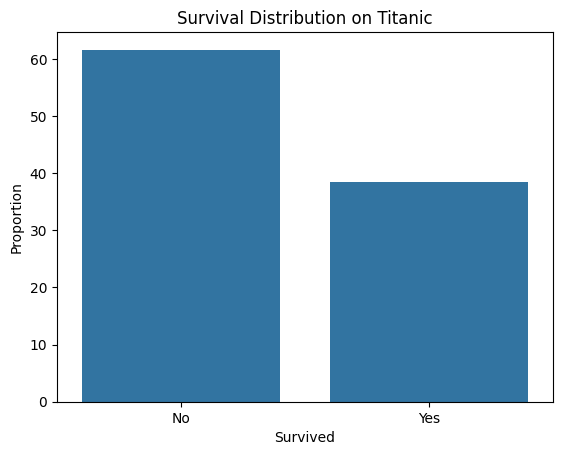

In [593]:
plt.title('Survival Distribution on Titanic')
plt.xlabel('Survived')
plt.ylabel('Proportion')

sns.barplot(data=df_survived_distribution, x=['No', 'Yes'], y='proportion');

In [594]:
# Expected output for the table showing the gender distribution.

,count,proportion
Gender,,
male,1154,64.76
female,628,35.24


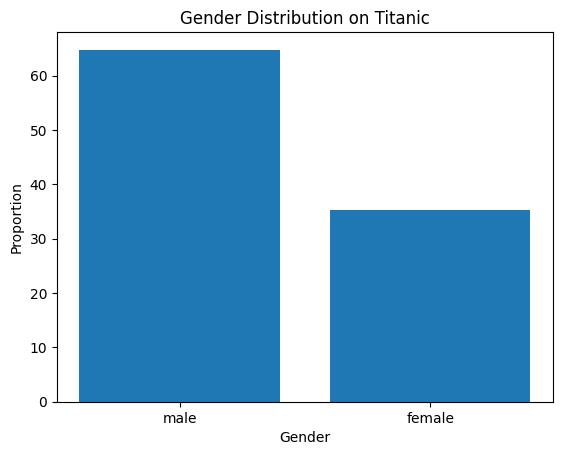

In [595]:
# Expected output.

In [ ]:
# Plot the same using seaborn.

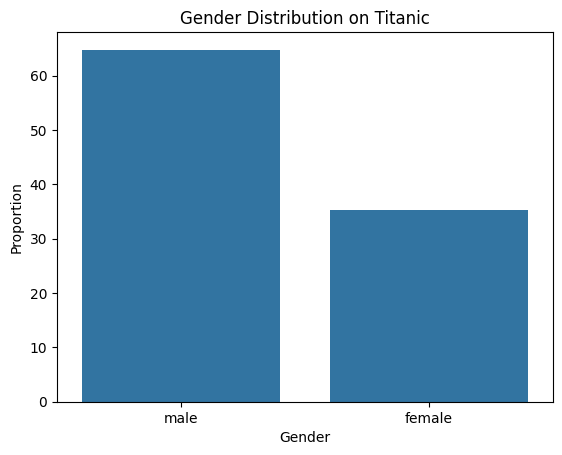

In [596]:
# Expected output.

In [ ]:
# Create a cross-tabulation of the columns `Gender` and `Survived`.

In [597]:
# Expected output.

Survived,0,1,All
Gender,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


In [ ]:
# Plot the survival rate based on gender using seaborn. What are the conclusions?
# Hint: use the `hue` parameter of the
# `sns.barplot`: https://seaborn.pydata.org/generated/seaborn.barplot.html
# When you pass `Survived` to it, the bins will get split based on whether the passenger survived or not.

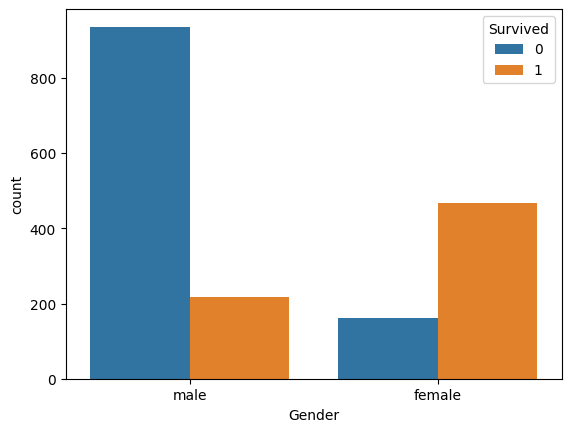

In [598]:
# Expected output.

# Feature selection

## Mutual information

Let's load testing dataframes.

In [599]:
df_test = pd.DataFrame({
    'is_female': ['Yes', 'Yes', 'Yes', 'No', 'No'],
    'survived': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
})
df_test

,is_female,survived
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,No,No
4,No,Yes


In [600]:
df_test_always_yes_is_female = pd.DataFrame({
    'is_female': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'survived': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
})
df_test_always_yes_is_female

,is_female,survived
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,No
4,Yes,Yes


In [601]:
df_test_perfect_match = pd.DataFrame({
    'is_female': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
    'survived': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
})
df_test_perfect_match

,is_female,survived
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,No,No
4,Yes,Yes


In [602]:
df_test_opposite_match = pd.DataFrame({
    'is_female': ['No', 'No', 'No', 'Yes', 'No'],
    'survived': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
})
df_test_opposite_match

,is_female,survived
0,No,Yes
1,No,Yes
2,No,Yes
3,Yes,No
4,No,Yes


In [603]:
df_test_perfect_match_balanced_classes = pd.DataFrame({
    'is_female': ['Yes', 'No', 'Yes', 'No'],
    'survived': ['Yes', 'No', 'Yes', 'No'],
})
df_test_perfect_match_balanced_classes

,is_female,survived
0,Yes,Yes
1,No,No
2,Yes,Yes
3,No,No


In [604]:
df_test_opposite_match_balanced_classes = pd.DataFrame({
    'is_female': ['No', 'Yes', 'No', 'Yes'],
    'survived': ['Yes', 'No', 'Yes', 'No'],
})
df_test_opposite_match_balanced_classes

,is_female,survived
0,No,Yes
1,Yes,No
2,No,Yes
3,Yes,No


In [605]:
df_test_exact_match_balanced_classes_different_types = pd.DataFrame({
    'is_female': [0, 1, 0, 1],
    'survived': ['Yes', 'No', 'Yes', 'No'],
})
df_test_exact_match_balanced_classes_different_types

,is_female,survived
0,0,Yes
1,1,No
2,0,Yes
3,1,No


**TASK 8**

Implement a function for calculating the `mutual information` between two categorical features.

Fill in missing values with the string 'NA' if such exist.

In [606]:
def mutual_information(df: pd.DataFrame, column_source: str, column_target: str) -> float:
    return 42

In [607]:
# Expected outputs.

print(f"df_test => {mutual_information(df_test, 'is_female', 'survived')}")

# Why is MI zero here?
print(f"df_test_always_yes_is_female => {mutual_information(df_test_always_yes_is_female, 'is_female', 'survived')}")

# Note, that when the columns change in the exact same way
# or the exact opposite way
# the MI value does not change.
print(f"df_test_perfect_match => {mutual_information(df_test_perfect_match, 'is_female', 'survived')}")
print(f"df_test_opposite_match => {mutual_information(df_test_opposite_match, 'is_female', 'survived')}")

# And when we have perfect dependence the value is 1.
print(f"df_test_perfect_match_balanced_classes => {mutual_information(df_test_perfect_match_balanced_classes, 'is_female', 'survived')}")
print(f"df_test_opposite_match_balanced_classes => {mutual_information(df_test_opposite_match_balanced_classes, 'is_female', 'survived')}")
print(f"df_test_exact_match_balanced_classes_different_types => {mutual_information(df_test_exact_match_balanced_classes_different_types, 'is_female', 'survived')}")

df_test => 0.32192809488736224
df_test_always_yes_is_female => 0.0
df_test_perfect_match => 0.7219280948873621
df_test_opposite_match => 0.7219280948873621
df_test_perfect_match_balanced_classes => 1.0
df_test_opposite_match_balanced_classes => 1.0
df_test_exact_match_balanced_classes_different_types => 1.0


**TASK 9**

For all categorical variables, calculate their mutual information against the `Survived` column.

In [ ]:
# See all categorical variables.
# Use pandas `select_dtypes`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

In [608]:
# Expected output.

,Name,Gender,Ticket,Cabin,Embarked,split
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Train
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Train
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Train
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Train
4,"Allen, Mr. William Henry",male,373450,NaN,S,Train
...,...,...,...,...,...,...
1777,"Montvila, Rev. Juozas",male,211536,NaN,S,Test
1778,"Graham, Miss. Margaret Edith",female,112053,B42,S,Test
1779,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S,Test
1780,"Behr, Mr. Karl Howell",male,111369,C148,C,Test


In [ ]:
# Print the categorical values as a list.

In [609]:
# Expected output.

['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked', 'split']

In [ ]:
# Calculate the mutual information for all categorical variables.
# In the example output, the column "split" is present. Feel free to drop it as it is not needed.

In [610]:
# Expected outputs.
# Notice how "Name" and "Ticket" have very high MI. This illustrates the problem of having high variance when using MI.

Name        0.960708
Ticket      0.825937
Cabin       0.238386
Gender      0.217660
Embarked    0.024047
split       0.000000
dtype: float64

In [ ]:
# Use the "mutual_info_classif" function to do a sanity check for the "Gender" column.

In [611]:
# Expected output.

array([0.15087049])

## Chi-square Test

**TASK 10**

Create such a dataframe that it matches the output from `pd.crosstab`.

In [613]:
# Expected output.
pd.crosstab(df_test['gender'], df_test['animal'])

animal,cat,dog
gender,,
men,207,282
women,231,242


**TASK 11**

Implement a function for performing the chi-square test. Fill in missing values with the string 'NA' if such exist.

In [614]:
def chi_square(df: pd.DataFrame, column_source: str, column_target: str) -> float:
    return 42

# Expected output.
chi_square(df_test, 'gender', 'animal')

0.04279386669738383

**TASK 12**

Calculate the `chi-square` `p-value` for all categorical columns.

Feel free to drop the `split` column.

In [615]:
# Expected outputs.

split       1.000000e+00
Embarked    8.127943e-13
Name        0.000000e+00
Gender      0.000000e+00
Ticket      0.000000e+00
Cabin       0.000000e+00
dtype: float64

In [ ]:
# Do a sanity check using `chi2` on `Gender`.

In [616]:
# Expected outputs.

(array([340.69625418]), array([4.50027733e-76]))

**TASK 13**

Apply to `chi-square test` on the `Age` column

Break it into three bins: `young`, `middle-aged`, `elder`.

Use [pd.cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html#pandas.cut) for automatic binning.

Convert the output of `pd.cut` to a string.

In [617]:
# Expected output after applying `pd.cut`.

/tmp/ipykernel_5812/1479116372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic['age_binned'] = pd.cut(df_titanic['Age'], 3, labels=['young', 'middle-aged', 'elder']).astype(str)


,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,split,Survived,age_binned
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,0,young
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,1,middle-aged
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,1,young
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train,1,middle-aged
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train,0,middle-aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Test,0,middle-aged
1778,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Test,1,young
1779,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Test,0,nan
1780,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Test,1,young


In [618]:
# Expected chi-squared p-value of `age_binned` against `Survived`.

0.000321535529961281

**TASK 14**

Plot `age_binned` against `Survived` using `seaborn`.

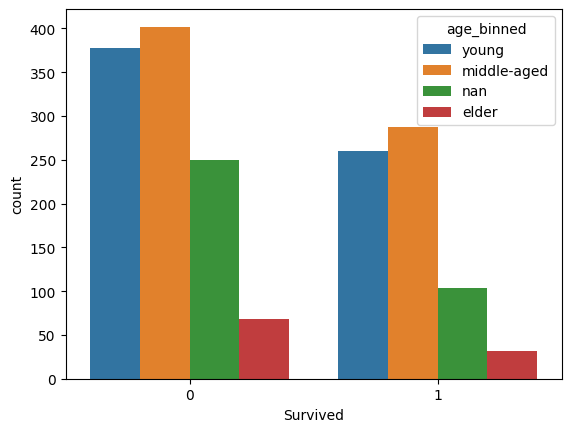

In [619]:
# Expected output.